In [1]:
!pip install tensorflow

In [2]:
import tensorflow as tf  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
import glob
import os

In [7]:
image_net = glob.glob(r"C:\SUMMER_PROJECTS\Is the road safe-PROJECT\Chest-XRay dataset\chest_xray\train/*/**")

In [8]:
len(image_net)

5216

In [9]:
image_net[0]

'C:\\SUMMER_PROJECTS\\Is the road safe-PROJECT\\Chest-XRay dataset\\chest_xray\\train\\NORMAL\\IM-0115-0001.jpeg'

In [10]:
from random import shuffle
shuffle(image_net)
image_net

['C:\\SUMMER_PROJECTS\\Is the road safe-PROJECT\\Chest-XRay dataset\\chest_xray\\train\\PNEUMONIA\\person1288_bacteria_3251.jpeg',
 'C:\\SUMMER_PROJECTS\\Is the road safe-PROJECT\\Chest-XRay dataset\\chest_xray\\train\\PNEUMONIA\\person495_bacteria_2094.jpeg',
 'C:\\SUMMER_PROJECTS\\Is the road safe-PROJECT\\Chest-XRay dataset\\chest_xray\\train\\PNEUMONIA\\person296_bacteria_1391.jpeg',
 'C:\\SUMMER_PROJECTS\\Is the road safe-PROJECT\\Chest-XRay dataset\\chest_xray\\train\\PNEUMONIA\\person1082_virus_1794.jpeg',
 'C:\\SUMMER_PROJECTS\\Is the road safe-PROJECT\\Chest-XRay dataset\\chest_xray\\train\\PNEUMONIA\\person330_virus_683.jpeg',
 'C:\\SUMMER_PROJECTS\\Is the road safe-PROJECT\\Chest-XRay dataset\\chest_xray\\train\\PNEUMONIA\\person762_virus_1390.jpeg',
 'C:\\SUMMER_PROJECTS\\Is the road safe-PROJECT\\Chest-XRay dataset\\chest_xray\\train\\PNEUMONIA\\person1411_bacteria_3603.jpeg',
 'C:\\SUMMER_PROJECTS\\Is the road safe-PROJECT\\Chest-XRay dataset\\chest_xray\\train\\PNEUMONIA

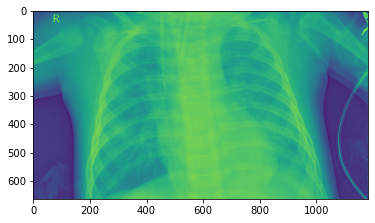

In [11]:
from PIL import Image
img=Image.open(image_net[0])
plt.imshow(img)

In [12]:
np.array(img).shape

(664, 1184)

In [17]:
v=(128,128)

In [18]:
!pip install opencv-python

In [19]:
import cv2

In [20]:
img=cv2.imread(image_net[0],cv2.IMREAD_GRAYSCALE)
img1 = np.array(img)
p = cv2.resize(img1,v)

In [25]:
p.shape

(128, 128)

In [26]:
X_train=np.zeros((len(image_net),128,128))
Y_train=np.zeros((len(image_net),1))
for i, fi in enumerate(image_net):
    img=cv2.imread(fi,cv2.IMREAD_GRAYSCALE)
    img1 = np.array(img)
    p = cv2.resize(img1,v)
    X_train[i,:,:]=p
    Y_train[i]=   fi[-6]

In [27]:
X_train[0]

array([[ 57.,  61.,  65., ...,  51., 188.,  40.],
       [ 62.,  66.,  68., ...,  51., 190., 197.],
       [ 65.,  69.,  72., ...,  54., 191., 191.],
       ...,
       [ 48.,  52.,  54., ...,  43.,  58.,  38.],
       [ 46.,  45.,  51., ...,  47., 151.,  90.],
       [ 48.,  43.,  47., ...,  47.,  51.,  74.]])

In [28]:
X_train/255.0

array([[[0.22352941, 0.23921569, 0.25490196, ..., 0.2       ,
         0.7372549 , 0.15686275],
        [0.24313725, 0.25882353, 0.26666667, ..., 0.2       ,
         0.74509804, 0.77254902],
        [0.25490196, 0.27058824, 0.28235294, ..., 0.21176471,
         0.74901961, 0.74901961],
        ...,
        [0.18823529, 0.20392157, 0.21176471, ..., 0.16862745,
         0.22745098, 0.14901961],
        [0.18039216, 0.17647059, 0.2       , ..., 0.18431373,
         0.59215686, 0.35294118],
        [0.18823529, 0.16862745, 0.18431373, ..., 0.18431373,
         0.2       , 0.29019608]],

       [[0.19607843, 0.20392157, 0.21176471, ..., 0.33333333,
         0.31372549, 0.30980392],
        [0.2       , 0.20392157, 0.21176471, ..., 0.32156863,
         0.30588235, 0.29803922],
        [0.19215686, 0.20392157, 0.20784314, ..., 0.30980392,
         0.28627451, 0.26666667],
        ...,
        [0.21568627, 0.26666667, 0.35686275, ..., 0.41176471,
         0.33333333, 0.24705882],
        [0.2

In [35]:
from tensorflow.keras.layers import Dense, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization

In [36]:
model = keras.Sequential()
model.add(Conv2D(32,(3,3),strides=2,padding='Same',activation='relu',input_shape
         =(128, 128, 1)))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(Dropout(0.3)) #here added dropout
model.add(Conv2D(64,(3,3), strides=1,padding= 'Same', activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3), strides=1,padding= 'Same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3), strides=1,padding= 'Same', activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(3, activation = "softmax"))


In [37]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [38]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 64, 64, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)      

In [39]:
X_train=X_train.reshape(len(X_train),128,128,1)

In [40]:
X_train.shape

(5216, 128, 128, 1)